# Dataset outline

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
df=pd.read_csv('diabetes_prediction_dataset.csv')


In [2]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

We can see from the values the dataset has 91,500 cases of labelled non-diabetic patients against 8,500 with diabetes. This suggest that the dataset is highly unbalanced and that we will have to perform a sampling operation if we want to have better results when training our models.

# 1. Preparing data for classification model

First we are going to transform the categorical data into numerical for the gender and smoking history.

In [6]:
df_prep=df.copy()

In [7]:
df_prep['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [8]:
df_prep['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

We will not be considering the other since there are very few cases and might create outliers in our data

In [9]:
df_prep=df_prep.loc[df_prep['gender']!='Other']

In [10]:
df_gender=pd.get_dummies(df_prep['gender'])
df_gender=df_gender[['Female','Male']].apply(pd.to_numeric,errors='coerce').astype(int)
df_smoking=pd.get_dummies(df_prep['smoking_history'])
df_smoking=df_smoking[['No Info','never','former','current','not current','ever']].apply(pd.to_numeric,errors='coerce').astype(int)
print(df_smoking)
df_prep=pd.concat([df_prep,df_gender,df_smoking],axis=1)


       No Info  never  former  current  not current  ever
0            0      1       0        0            0     0
1            1      0       0        0            0     0
2            0      1       0        0            0     0
3            0      0       0        1            0     0
4            0      0       0        1            0     0
...        ...    ...     ...      ...          ...   ...
99995        1      0       0        0            0     0
99996        1      0       0        0            0     0
99997        0      0       1        0            0     0
99998        0      1       0        0            0     0
99999        0      0       0        1            0     0

[99982 rows x 6 columns]


In [11]:
df_prep.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,No Info,never,former,current,not current,ever
0,Female,80.0,0,1,never,25.19,6.6,140,0,1,0,0,1,0,0,0,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1,0,1,0,0,0,0,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,0,1,0,1,0,0,0,0
3,Female,36.0,0,0,current,23.45,5.0,155,0,1,0,0,0,0,1,0,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,0,1,0,0,0,1,0,0


In [12]:
df_prep=df_prep.reset_index()
df_prep=df_prep.rename(columns={'index':'Id'})
df_taget=df_prep[['Id','diabetes']]

In [13]:
df_prep.columns

Index(['Id', 'gender', 'age', 'hypertension', 'heart_disease',
       'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level',
       'diabetes', 'Female', 'Male', 'No Info', 'never', 'former', 'current',
       'not current', 'ever'],
      dtype='object')

Reduce datset to only numerical values and features without target ('diabetes')

In [14]:
df_prep=df_prep[['diabetes','Id','age', 'hypertension', 'heart_disease','bmi', 'HbA1c_level', 'blood_glucose_level','Female',
       'Male', 'No Info', 'never', 'former', 'current', 'not current', 'ever']]


In [15]:
df_prep=df_prep.rename(columns={'diabetes':'Diabetes','age':'Age', 'hypertension':'Hypertension', 'heart_disease':'Heart_Disease','bmi':'BMI', 
                                'HbA1c_level':'HBA1C_Level', 'blood_glucose_level':'Blood_Glucose_Level', 'No Info':'Smoking_No_Info',
                                  'never':'Smoking_Never', 'former':'Smoking_Former', 'current':'Smoking_Current',
                                    'not current':'Smoking_Not_Current', 'ever':'Smoking_Ever'})

In [16]:
df_prep.query('Smoking_Ever == 1')

,Diabetes,Id,Age,Hypertension,Heart_Disease,BMI,HBA1C_Level,Blood_Glucose_Level,Female,Male,Smoking_No_Info,Smoking_Never,Smoking_Former,Smoking_Current,Smoking_Not_Current,Smoking_Ever
19,0,19,37.0,0,0,25.72,3.5,159,0,1,0,0,0,0,0,1
65,0,65,59.0,0,1,23.11,6.5,200,1,0,0,0,0,0,0,1
88,0,88,38.0,0,0,22.42,6.0,85,1,0,0,0,0,0,0,1
103,0,103,55.0,0,0,18.60,6.0,160,1,0,0,0,0,0,0,1
156,0,156,54.0,0,0,26.72,6.1,158,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99877,0,99895,74.0,0,0,27.32,3.5,85,0,1,0,0,0,0,0,1
99931,0,99949,26.0,0,0,21.50,6.5,160,1,0,0,0,0,0,0,1
99935,0,99953,59.0,1,0,60.52,3.5,158,1,0,0,0,0,0,0,1
99938,0,99956,26.0,0,0,25.60,6.6,90,0,1,0,0,0,0,0,1


In [17]:
df_prep_corr=df_prep.corr()

<Axes: >

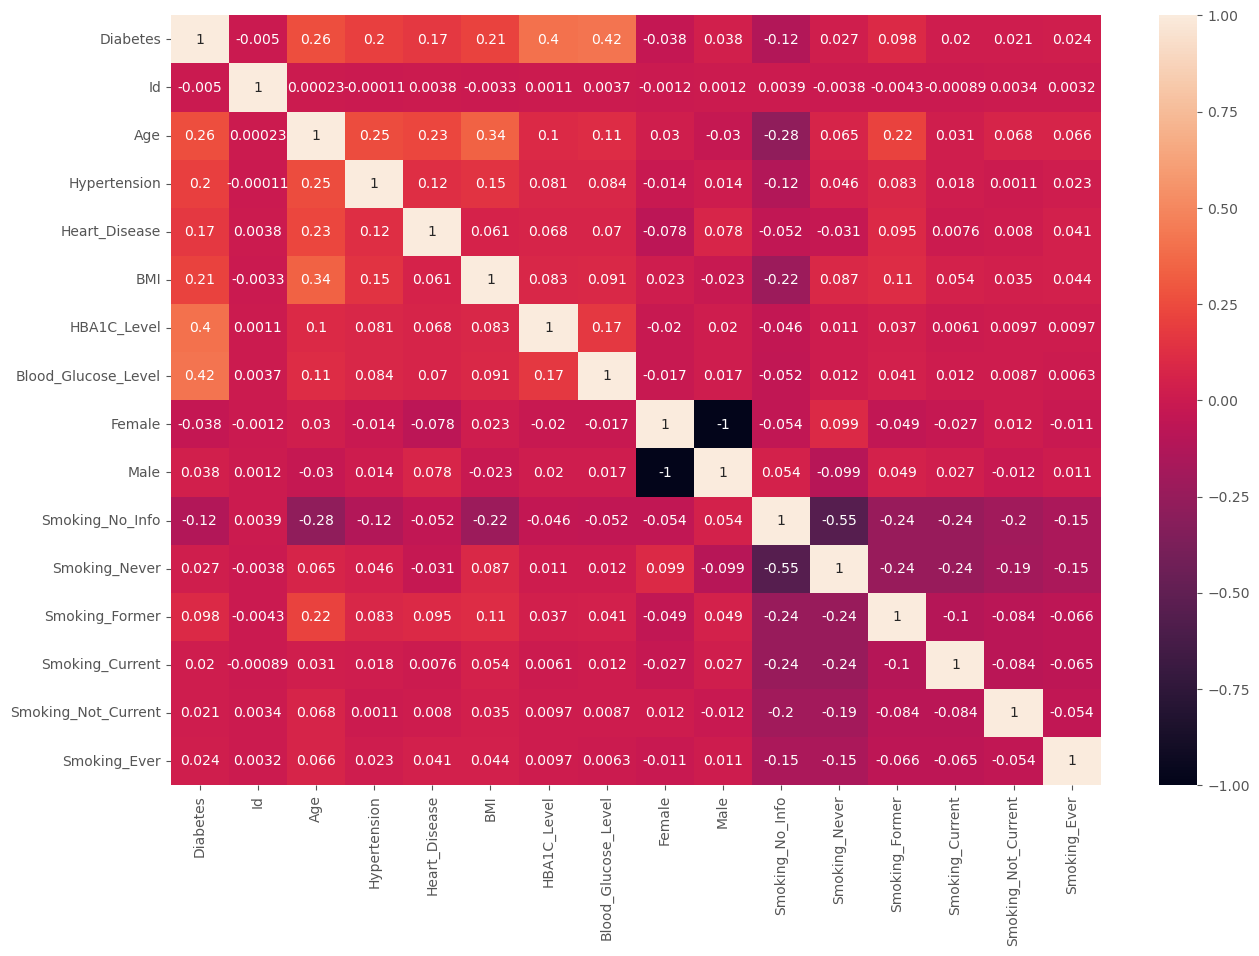

In [18]:
fig_ax=plt.subplots(figsize=(15,10))
sns.heatmap(df_prep_corr,annot=True)

In [19]:
from scipy.stats import pearsonr
for c in df_prep.columns[1:-1]:
    correlation, p_value= pearsonr(df_prep[c],df_prep['Diabetes'])
    print(f'{c: <40}: {correlation: .4f}, significant {p_value <= 0.05}')

Id                                      : -0.0050, significant False
Age                                     :  0.2580, significant True
Hypertension                            :  0.1978, significant True
Heart_Disease                           :  0.1717, significant True
BMI                                     :  0.2144, significant True
HBA1C_Level                             :  0.4007, significant True
Blood_Glucose_Level                     :  0.4196, significant True
Female                                  : -0.0376, significant True
Male                                    :  0.0376, significant True
Smoking_No_Info                         : -0.1190, significant True
Smoking_Never                           :  0.0272, significant True
Smoking_Former                          :  0.0979, significant True
Smoking_Current                         :  0.0196, significant True
Smoking_Not_Current                     :  0.0208, significant True


Defining the FEATURES and TARGET

In [20]:
df_prep.columns

Index(['Diabetes', 'Id', 'Age', 'Hypertension', 'Heart_Disease', 'BMI',
       'HBA1C_Level', 'Blood_Glucose_Level', 'Female', 'Male',
       'Smoking_No_Info', 'Smoking_Never', 'Smoking_Former', 'Smoking_Current',
       'Smoking_Not_Current', 'Smoking_Ever'],
      dtype='object')

In [21]:
df_prep.Diabetes.value_counts()

Diabetes
0    91482
1     8500
Name: count, dtype: int64

In [22]:
FEATURES=['Age', 'Hypertension', 'Heart_Disease', 'BMI',
       'HBA1C_Level', 'Blood_Glucose_Level', 'Female', 'Male',
       'Smoking_No_Info', 'Smoking_Never', 'Smoking_Former', 'Smoking_Current',
       'Smoking_Not_Current', 'Smoking_Ever']
TARGET=['Diabetes']


# Data Visualisation

<Axes: xlabel='Diabetes'>

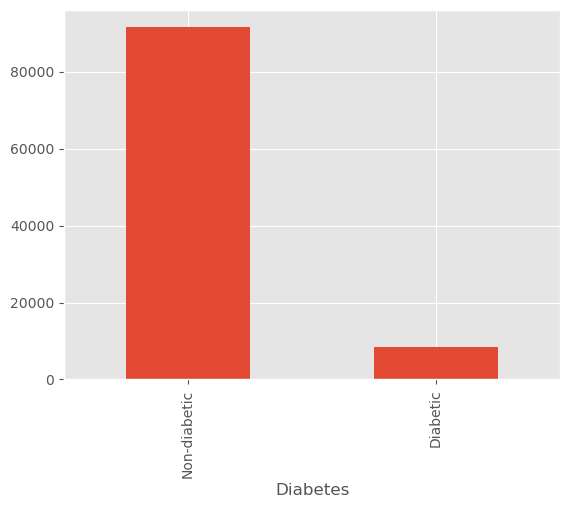

In [31]:
df_plot=df_prep.copy()
diabetes_map={0:'Non-diabetic',1:'Diabetic'}
df_plot['Diabetes']=df_plot['Diabetes'].map(diabetes_map)
df_plot.Diabetes.value_counts().plot(kind='bar')

c:\Users\tmara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\tmara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\tmara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\tmara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


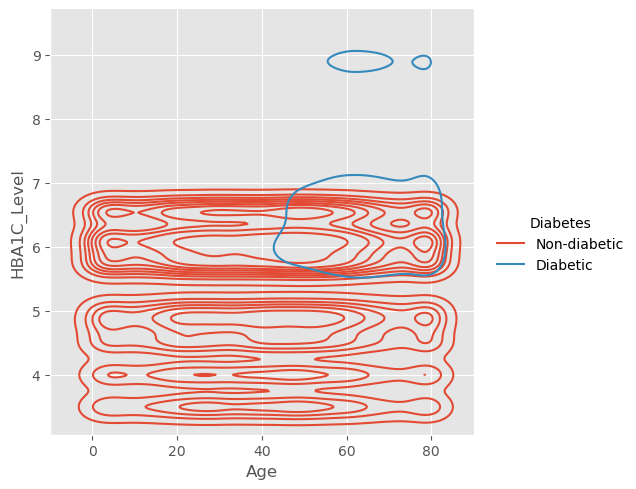

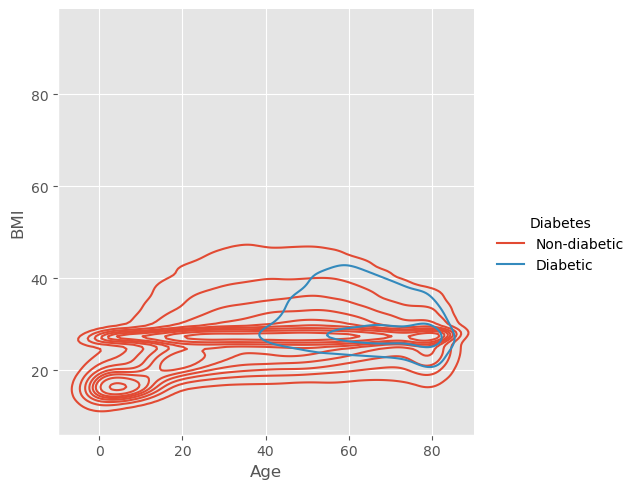

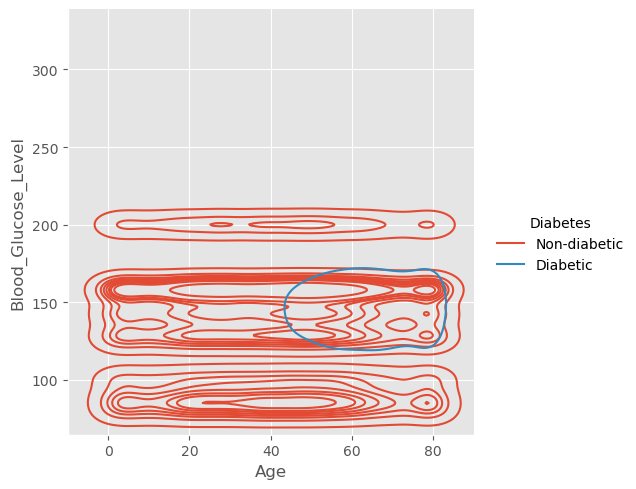

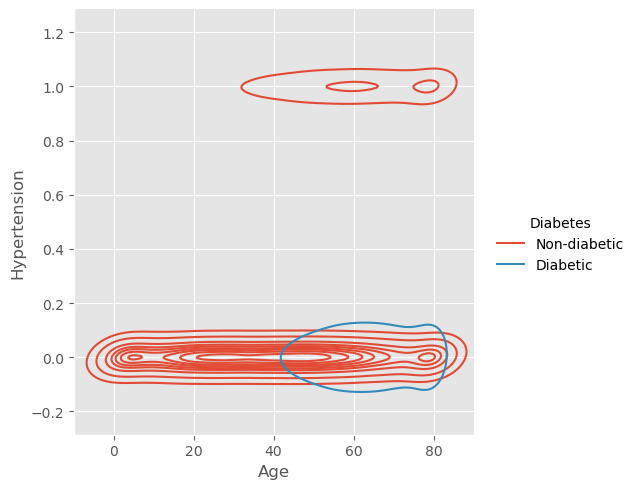

In [32]:


sns.displot(df_plot,x='Age',y='HBA1C_Level',hue='Diabetes',kind='kde')
sns.displot(df_plot,x='Age',y='BMI',hue='Diabetes',kind='kde')
sns.displot(df_plot,x='Age',y='Blood_Glucose_Level',kind='kde',hue='Diabetes')

c:\Users\tmara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


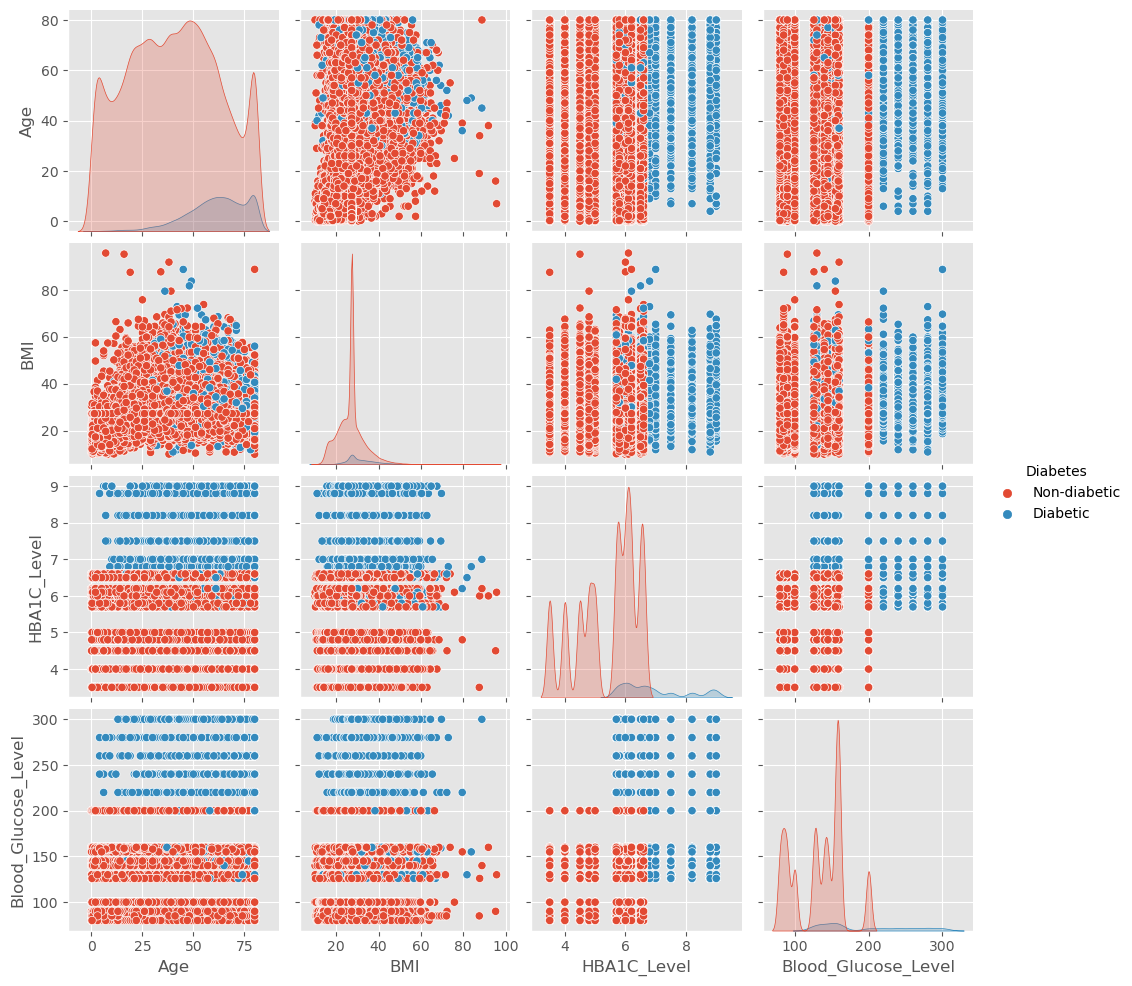

In [36]:
sns.pairplot(df_plot[['Age', 'BMI',
       'HBA1C_Level', 'Blood_Glucose_Level','Diabetes']],hue='Diabetes')

<Axes: >

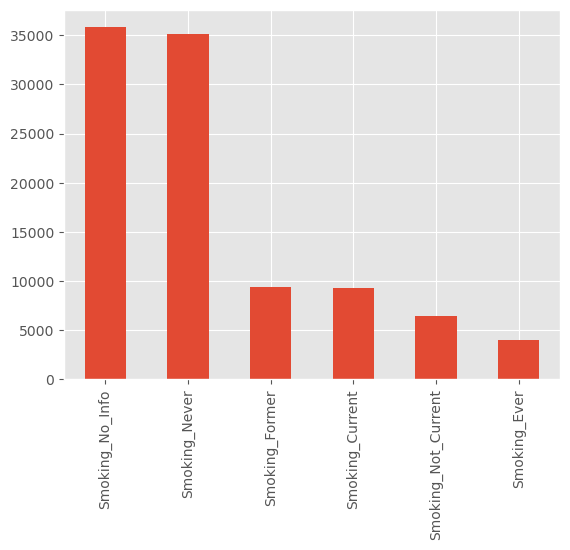

In [25]:
df_prep[['Smoking_No_Info', 'Smoking_Never', 'Smoking_Former', 'Smoking_Current',
       'Smoking_Not_Current', 'Smoking_Ever']].sum(axis=0).plot(kind='bar')

c:\Users\tmara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


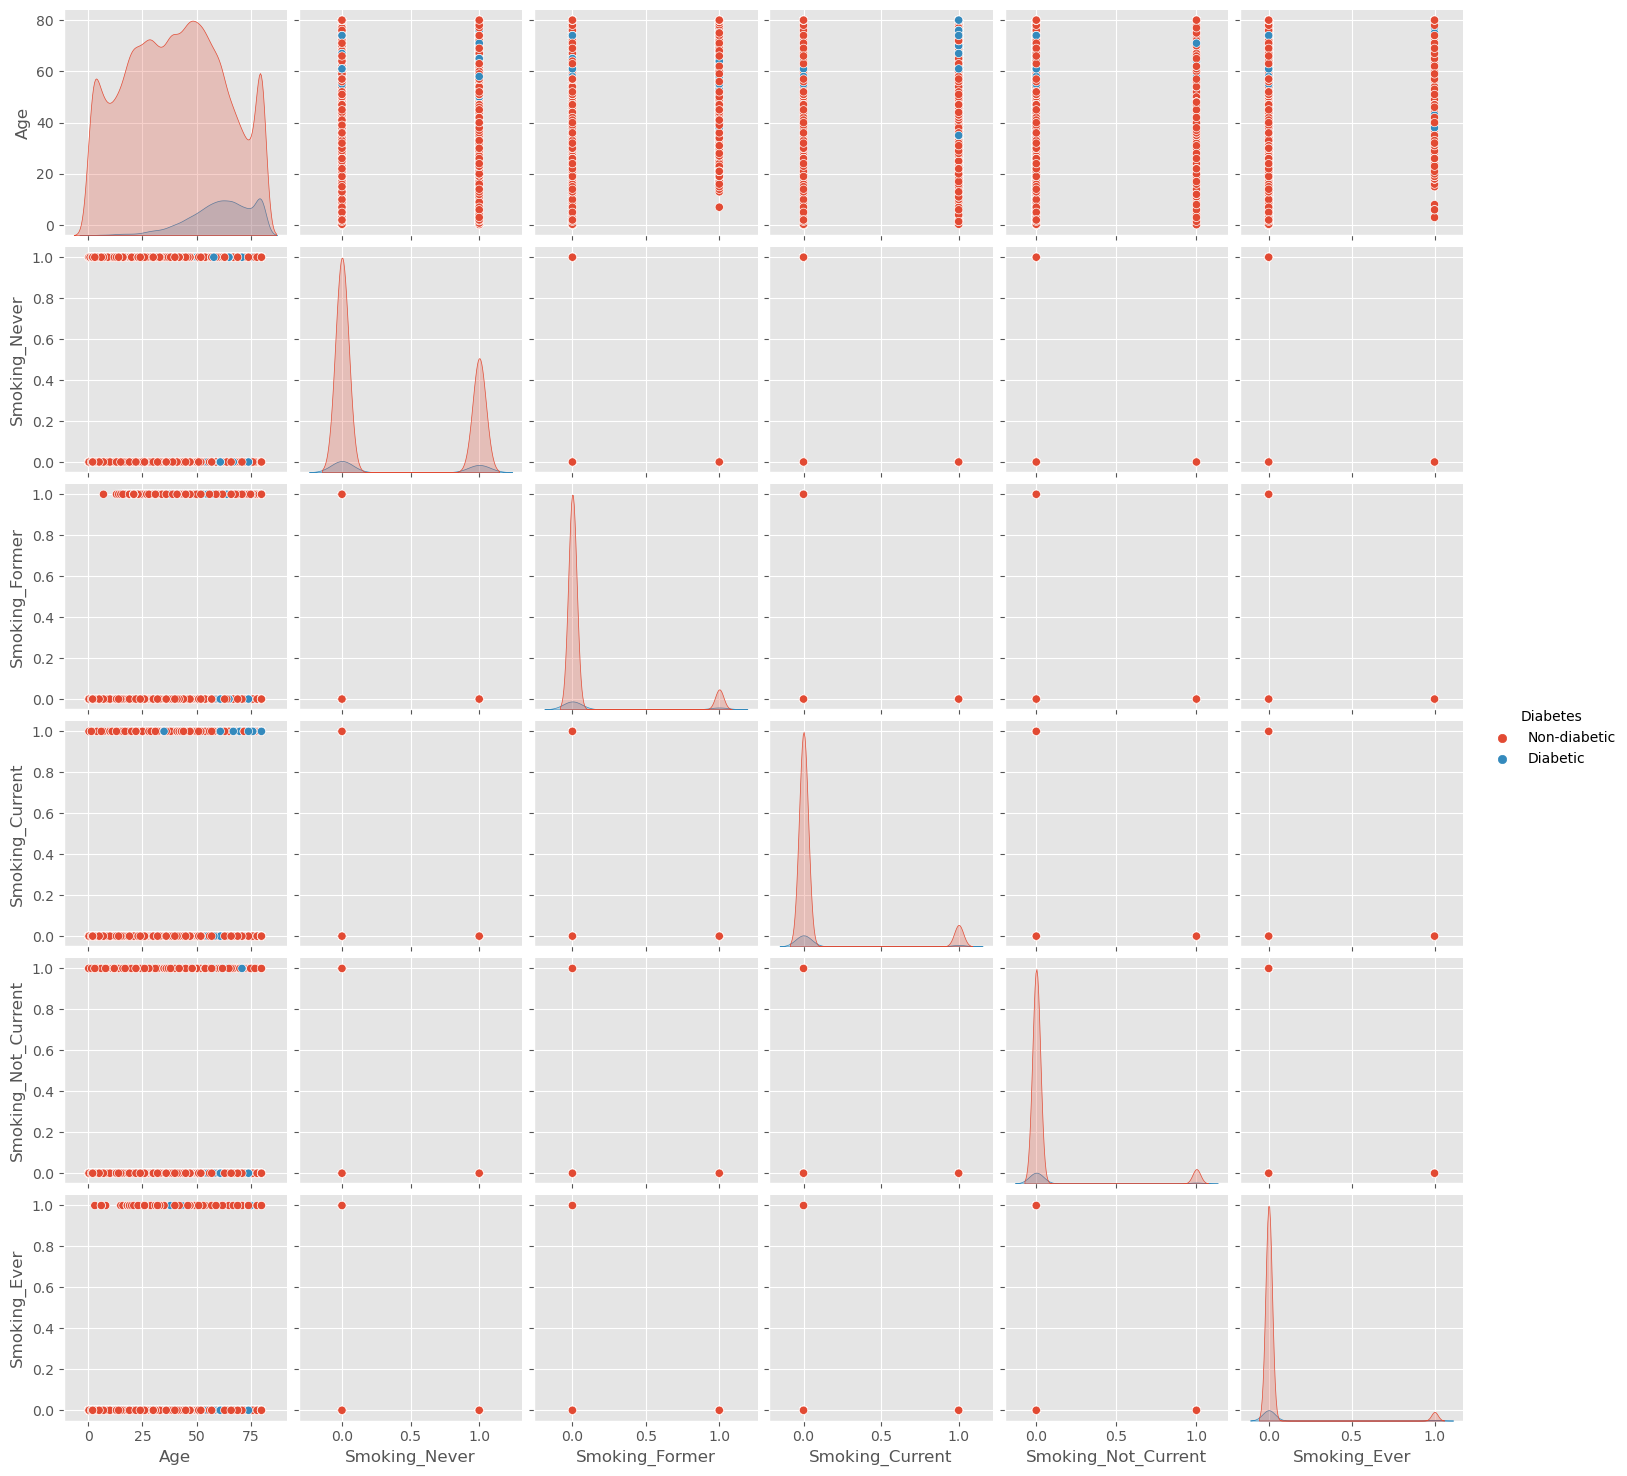

In [37]:
sns.pairplot(df_plot[['Age','Smoking_Never', 'Smoking_Former', 'Smoking_Current',
       'Smoking_Not_Current', 'Smoking_Ever','Diabetes']],hue='Diabetes')

After seeing the correlation between features and now the corraltion between diabetes and smoking I think it is reasonable to assume that smoking does not have a significant correlation with diabetes.

In [42]:
df_model=df_prep[['Age', 'BMI', 'Hypertension', 'Heart_Disease','HBA1C_Level', 'Blood_Glucose_Level','Diabetes']]
FEATURES=['Age', 'BMI', 'Hypertension', 'Heart_Disease','HBA1C_Level', 'Blood_Glucose_Level']

# Cross Validation: Train/Test

Firstly, lets try with the classic train_test_split

In [43]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

def get_x_y(df):
    df_val=df.copy()
    X, y=df_val[FEATURES],df_val[TARGET]
    return X,y
X, y=get_x_y(df_model)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf= RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
pred_prob=clf.predict_proba(X_test)[:,1]

acc_score=accuracy_score(y_test,pred)
auc_score=roc_auc_score(y_test,pred_prob)
print(f'Our accuracy on the validation set is {acc_score : .4f} and AUC is {auc_score : .4f}.')


c:\Users\tmara\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Our accuracy on the validation set is  0.9711 and AUC is  0.9635.


<Axes: >

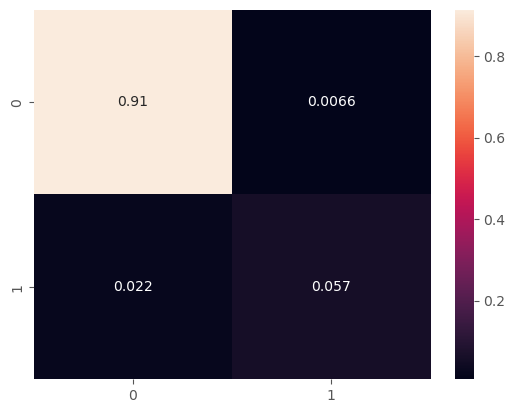

In [44]:
from sklearn.metrics import confusion_matrix

conf=confusion_matrix(y_test,pred,normalize='all')

sns.heatmap(conf,annot=True)